In [16]:
# check performance of different versions using Monte Carlo
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "gtracr"))

from trajectory import Trajectory
from constants import EARTH_RADIUS

import time

In [17]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2e}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12.0)

In [18]:
# geographic location parameters
lat = 0.
lng = 0.
detector_alt = 0.
particle_alt = 100.  # particle altitude
rigidity=40.  # arbitrarily set
# integration parameters
max_iter = 100    # maximum number of iterations
dt = 1e-5    # step size in integration
max_step = 10000   # max steps in integration
# initialize performance benchmark time variables
time_python_dip = 0.
time_cpp_novec_dip = 0.
time_cpp_vec_dip = 0.
time_python_igrf = 0.
time_cpp_novec_igrf = 0.
time_cpp_vec_igrf = 0.
time_hydra = 0.

In [19]:
# python, dipole
for i in range(max_iter):
    (azimuth, zenith) = np.random.rand(2)
    azimuth *= 360.
    zenith *= 180.
    traj = Trajectory(
        "p+",
        latitude=lat,
        longitude=lng,
        detector_altitude=detector_alt,
        zenith_angle=zenith,
        azimuth_angle=azimuth,
        particle_altitude=particle_alt,
        rigidity=rigidity,
        bfield_type="dipole"
    )
    start_time = time.perf_counter()
    traj.get_trajectory(dt=dt, max_step=max_step, use_python=True)  
    stop_time = time.perf_counter()
    time_python_dip += stop_time - start_time

In [20]:
# python, igrf
for i in range(max_iter):
    (azimuth, zenith) = np.random.rand(2)
    azimuth *= 360.
    zenith *= 180.
    traj = Trajectory(
        "p+",
        latitude=lat,
        longitude=lng,
        detector_altitude=detector_alt,
        zenith_angle=zenith,
        azimuth_angle=azimuth,
        particle_altitude=particle_alt,
        rigidity=rigidity,
        bfield_type="igrf"
    )
    start_time = time.perf_counter()
    traj.get_trajectory(dt=dt, max_step=max_step, use_python=True)  
    stop_time = time.perf_counter()
    time_python_igrf += stop_time - start_time

In [21]:
# C++, dipole, unvectorized
for i in range(max_iter):
    (azimuth, zenith) = np.random.rand(2)
    azimuth *= 360.
    zenith *= 180.
    traj = Trajectory(
        "p+",
        latitude=lat,
        longitude=lng,
        detector_altitude=detector_alt,
        zenith_angle=zenith,
        azimuth_angle=azimuth,
        particle_altitude=particle_alt,
        rigidity=rigidity,
        bfield_type="dipole"
    )
    start_time = time.perf_counter()
    traj.get_trajectory(dt=dt, max_step=max_step, use_python=False, use_unvectorized=True)  
    stop_time = time.perf_counter()
    time_cpp_novec_dip += stop_time - start_time

In [22]:
# C++, igrf, unvectorized
for i in range(max_iter):
    (azimuth, zenith) = np.random.rand(2)
    azimuth *= 360.
    zenith *= 180.
    traj = Trajectory(
        "p+",
        latitude=lat,
        longitude=lng,
        detector_altitude=detector_alt,
        zenith_angle=zenith,
        azimuth_angle=azimuth,
        particle_altitude=particle_alt,
        rigidity=rigidity,
        bfield_type="igrf"
    )
    start_time = time.perf_counter()
    traj.get_trajectory(dt=dt, max_step=max_step, use_python=False, use_unvectorized=True)  
    stop_time = time.perf_counter()
    time_cpp_novec_igrf += stop_time - start_time

In [23]:
# C++, dipole, vectorized
for i in range(max_iter):
    (azimuth, zenith) = np.random.rand(2)
    azimuth *= 360.
    zenith *= 180.
    traj = Trajectory(
        "p+",
        latitude=lat,
        longitude=lng,
        detector_altitude=detector_alt,
        zenith_angle=zenith,
        azimuth_angle=azimuth,
        particle_altitude=particle_alt,
        rigidity=rigidity,
        bfield_type="dipole"
    )
    start_time = time.perf_counter()
    traj.get_trajectory(dt=dt, max_step=max_step, use_python=False, use_unvectorized=False)  
    stop_time = time.perf_counter()
    time_cpp_vec_dip += stop_time - start_time

In [24]:
# C++, igrf, vectorized
for i in range(max_iter):
    (azimuth, zenith) = np.random.rand(2)
    azimuth *= 360.
    zenith *= 180.
    traj = Trajectory(
        "p+",
        latitude=lat,
        longitude=lng,
        detector_altitude=detector_alt,
        zenith_angle=zenith,
        azimuth_angle=azimuth,
        particle_altitude=particle_alt,
        rigidity=rigidity,
        bfield_type="igrf"
    )
    start_time = time.perf_counter()
    traj.get_trajectory(dt=dt, max_step=max_step, use_python=False, use_unvectorized=False)  
    stop_time = time.perf_counter()
    time_cpp_vec_igrf += stop_time - start_time

In [25]:
# get the average values for each of the results
# time_python_igrf = 200. * max_iter  # igrf in python takes max ~200 seconds per iteration
avg_timearr_dip = np.array([time_python_dip, time_cpp_novec_dip, time_cpp_vec_dip]) / max_iter
# avg_timearr_dip = np.array([time_cpp_novec_dip, time_cpp_vec_dip]) / max_iter
rel_avgtime_dip = avg_timearr_dip / avg_timearr_dip[-1]
# get the average values for each of the results
avg_timearr_igrf = np.array([time_python_igrf, time_cpp_novec_igrf, time_cpp_vec_igrf]) / max_iter
# avg_timearr_igrf = np.array([time_cpp_novec_dip, time_cpp_vec_dip]) / max_iter
rel_avgtime_igrf = avg_timearr_igrf / avg_timearr_dip[-1]

In [26]:
 # the labels, needs to be modified every time different modification is used
labels = ["Python (Vector)", "C++ (non-Vector)", "C++ (Vector)"] 
# labels = ["C++ (non-Vector)", "C++ (Vector)"] 

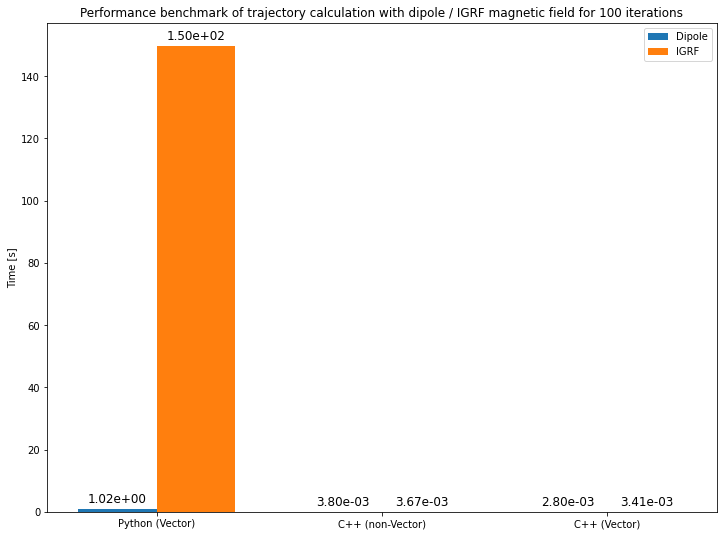

In [27]:

label_pos = np.arange(len(labels))
width = 0.35
# plot the histogram comparing the two values
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')  # to make saved plot have all white bg
bar_dip = ax.bar(label_pos - width/2, avg_timearr_dip, width, label="Dipole")
bar_igrf = ax.bar(label_pos + width/2, avg_timearr_igrf, width, label="IGRF")
# ax.bar(label_pos, rel_avgtime_dip, width)
ax.set_xticks(label_pos)
ax.set_xticklabels(labels)
ax.set_ylabel("Time [s]")
# ax.set_ylabel("Scale Factor relative to {:s} result".format(labels[-1]))
ax.set_title("Performance benchmark of trajectory calculation with dipole / IGRF magnetic field for {:d} iterations".format(max_iter))

autolabel(bar_dip)  # add labels at top of bar chart
autolabel(bar_igrf)  # add labels at top of bar chart

ax.legend()

PLOT_DIR = os.path.join(os.getcwd(), "..", "..", "..", "gtracr_plots")

# savefig_labels = ["pyvec", "cpp_novec", "cpp_vec"]
plt.savefig(os.path.join(PLOT_DIR, "traj_performance_benchmark_absscale.png"), bbox_inches='tight')

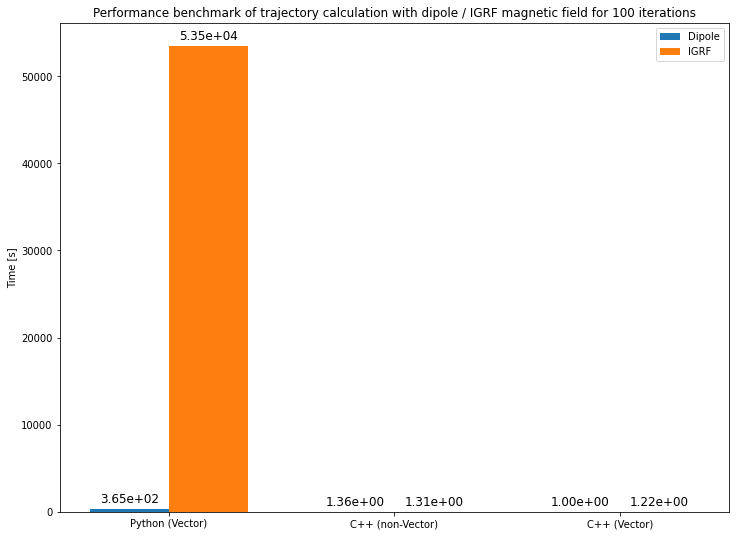

In [28]:

label_pos = np.arange(len(labels))
width = 0.35
# plot the histogram comparing the two values
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')  # to make saved plot have all white bg
bar_dip = ax.bar(label_pos - width/2, rel_avgtime_dip, width, label="Dipole")
bar_igrf = ax.bar(label_pos + width/2, rel_avgtime_igrf, width, label="IGRF")
# ax.bar(label_pos, rel_avgtime_dip, width)
ax.set_xticks(label_pos)
ax.set_xticklabels(labels)
ax.set_ylabel("Time [s]")
# ax.set_ylabel("Scale Factor relative to {:s} result".format(labels[-1]))
ax.set_title("Performance benchmark of trajectory calculation with dipole / IGRF magnetic field for {:d} iterations".format(max_iter))

autolabel(bar_dip)  # add labels at top of bar chart
autolabel(bar_igrf)  # add labels at top of bar chart

ax.legend()

PLOT_DIR = os.path.join(os.getcwd(), "..", "..", "..", "gtracr_plots")

# savefig_labels = ["pyvec", "cpp_novec", "cpp_vec"]
plt.savefig(os.path.join(PLOT_DIR, "traj_performance_benchmark_relscale.png"), bbox_inches='tight')